In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

In [ ]:
#reading in the files
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PREDICT H1N1 AND SEASONAL FLU VACCINES/training_set_labels.csv', index_col = "respondent_id")
train_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PREDICT H1N1 AND SEASONAL FLU VACCINES/training_set_features.csv', index_col = "respondent_id")
validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PREDICT H1N1 AND SEASONAL FLU VACCINES/test_set_features.csv', index_col = "respondent_id")


In [ ]:
train_labels.iloc[:,0].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [ ]:
train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [ ]:
train_labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [ ]:
train_features.shape

(26707, 35)

In [ ]:
train_labels.shape

(26707, 2)

In [ ]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
train_features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [ ]:
train_features.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
numeric_cols = train_features.columns[train_features.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
def scaler( df, cols_to_scale):
    for col in cols_to_scale:
      df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(train_features[col])), columns = [col])
    return df

scaler(train_features, numeric_cols )

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000000,0.0,NaN,NaN
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000000,0.0,pxcmvdjn,xgwztkwe
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.666667,0.0,rucpziij,xtkaffoo
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000000,0.0,NaN,NaN
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.333333,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.000000,0.0,NaN,NaN
26703,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",0.333333,0.0,fcxhlnwr,cmhcxjea
26704,0.666667,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.000000,0.0,NaN,NaN


In [ ]:
scaled = pd.DataFrame

In [ ]:
non_numeric_cols = train_features.columns[train_features.dtypes == "object"].values
print(non_numeric_cols)

['age_group' 'education' 'race' 'sex' 'income_poverty' 'marital_status'
 'rent_or_own' 'employment_status' 'hhs_geo_region' 'census_msa'
 'employment_industry' 'employment_occupation']


1. Age_group

Changing non-numeric categorical to numeric categorical

In [ ]:
pd.unique(train_features['age_group'])

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [ ]:
train_features= train_features.replace(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], ['4', '2', '1', '5', '3'])

In [ ]:
train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.000000,0.0,NaN,NaN
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.000000,0.0,pxcmvdjn,xgwztkwe
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.666667,0.0,rucpziij,xtkaffoo
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.000000,0.0,NaN,NaN
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.333333,0.0,wxleyezf,emcorrxb


2. education

In [ ]:
pd.unique(train_features['education'])

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [ ]:
 train_features["education"] = train_features["education"].replace(['< 12 Years', '12 Years', 'College Graduate', 'Some College'], ['1', '2', '3', '4'])

In [ ]:
train_features["education"].head()

respondent_id
0    1
1    2
2    3
3    2
4    4
Name: education, dtype: object

3. race

In [ ]:

pd.unique(train_features["race"])

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [ ]:
train_features["race"]= train_features["race"].replace(['White', 'Black', 'Other or Multiple', 'Hispanic'], ['1', '2', '3', '4'])

In [ ]:
train_features["race"].head()

respondent_id
0    1
1    1
2    1
3    1
4    1
Name: race, dtype: object

4. sex

In [ ]:
pd.unique(train_features["sex"])

array(['Female', 'Male'], dtype=object)

In [ ]:
train_features["sex"] = train_features["sex"].replace(['Female', 'Male'], ["0", "1"])

In [ ]:
train_features["sex"].head()

respondent_id
0    0
1    1
2    1
3    0
4    0
Name: sex, dtype: object

5. income_poverty

In [ ]:
pd.unique(train_features["income_poverty"])

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

In [ ]:
train_features["income_poverty"]= train_features["income_poverty"].replace(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],["1", "2", "3"])

In [ ]:
train_features["income_poverty"].head()

respondent_id
0    1
1    1
2    2
3    1
4    2
Name: income_poverty, dtype: object

6. marital_status

In [ ]:
pd.unique(train_features["marital_status"])

array(['Not Married', 'Married', nan], dtype=object)

In [ ]:
train_features["marital_status"] = train_features["marital_status"].replace(['Not Married', 'Married'], ["1", "2"] )

7. rent_or_own

In [ ]:
pd.unique(train_features["rent_or_own"])

array(['Own', 'Rent', nan], dtype=object)

In [ ]:
train_features["rent_or_own"] = train_features["rent_or_own"].replace(['Own', 'Rent'], ["1", "2"])

In [ ]:
train_features["rent_or_own"].head()

respondent_id
0    1
1    2
2    1
3    2
4    1
Name: rent_or_own, dtype: object

8. employment_status

In [ ]:
pd.unique(train_features["employment_status"])

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

In [ ]:
train_features["employment_status"] = train_features["employment_status"].replace(['Not in Labor Force', 'Employed', 'Unemployed'], ["1", "2", "3"])

In [ ]:
train_features["employment_status"].head()

respondent_id
0    1
1    2
2    2
3    1
4    2
Name: employment_status, dtype: object

9. hhs_geo_region

In [ ]:
pd.unique(train_features["hhs_geo_region"])

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [ ]:
train_features["hhs_geo_region"] = train_features["hhs_geo_region"].replace(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'], ['1', '2','3', '4', '5', '6', '7', '8', '9', '10'])

In [ ]:
train_features["hhs_geo_region"].head()

respondent_id
0    1
1    2
2    3
3    4
4    3
Name: hhs_geo_region, dtype: object

10. census_msa

In [ ]:

pd.unique(train_features["census_msa"])

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [ ]:
train_features["census_msa"] = train_features["census_msa"].replace(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'], ["1", '2', '3'])

In [ ]:
data = train_features


 11. employment_industry



In [ ]:
pd.unique(train_features["employment_industry"])

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [ ]:
train_features["employment_industry"] = train_features["employment_industry"].replace(['pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], ['1', '2','3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15', '16', '17', '18', '19', '20', '21'])

12. employment_occupation

In [ ]:
pd.unique(train_features["employment_occupation"])

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [ ]:
train_features["employment_occupation"] = train_features["employment_occupation"].replace(['xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], ['1', '2','3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])

In [ ]:
train_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,1,1,1,1,1,0.000000,0.0,NaN,NaN
1,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,2,2,2,2,0.000000,0.0,1,1
2,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2,1,1,2,3,2,0.666667,0.0,2,2
3,0.333333,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,1,2,1,4,3,0.000000,0.0,NaN,NaN
4,0.666667,0.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2,2,1,2,3,2,0.333333,0.0,3,3


In [ ]:
data = train_features.iloc[:,:-2]

In [ ]:
data.describe(include = "all")

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26707,26707,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,10,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,2,2,1,2,6,2,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,4297,11645,NaN,NaN
mean,0.539495,0.631266,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.295500,0.178194
std,0.303437,0.309075,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251141,0.309391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,0.333333,0.500000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,0.666667,0.500000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.000000
75%,0.666667,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.333333


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [ ]:
data = data.loc[:, data.columns != 'health_insurance']

In [ ]:

data_new.info()

NameError: ignored

In [ ]:
corr_matrix = data_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [ ]:
clean_data = data.dropna(axis =0)

In [ ]:
train_labels.reset_index()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [ ]:
clean_data.shape

(19642, 32)

In [ ]:
merged_data = pd.merge(clean_data, train_labels, left_on = 'respondent_id', right_on = 'respondent_id', how = "inner")

In [ ]:
merged_data.iloc[:,32:35]

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
3,0,1
4,0,0
5,0,0
...,...,...
26700,0,1
26701,0,0
26702,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(clean_data, merged_data.iloc[:,32:35], test_size = 0.2)

In [ ]:
LR=LogisticRegression(penalty = "elasticnet" , solver = 'saga', l1_ratio=0.99)

In [ ]:
LR1 = LR.fit(x_train, y_train.iloc[:,0])

In [ ]:
preds_1= LR.predict_proba(x_test)
preds_1

array([[0.76845435, 0.23154565],
       [0.85099077, 0.14900923],
       [0.11302551, 0.88697449],
       ...,
       [0.87249194, 0.12750806],
       [0.84920732, 0.15079268],
       [0.28742235, 0.71257765]])

In [ ]:
preds_2= LR1.predict_proba(x_test)
preds_2

array([[0.76845435, 0.23154565],
       [0.85099077, 0.14900923],
       [0.11302551, 0.88697449],
       ...,
       [0.87249194, 0.12750806],
       [0.84920732, 0.15079268],
       [0.28742235, 0.71257765]])

In [ ]:
LR_2 = LR.fit(x_train, y_train.iloc[:,1])

In [ ]:
preds_2 = LR_2.predict_proba(x_test)
preds_2

array([[0.37554519, 0.62445481],
       [0.73101423, 0.26898577],
       [0.0527062 , 0.9472938 ],
       ...,
       [0.87517559, 0.12482441],
       [0.75821518, 0.24178482],
       [0.35634512, 0.64365488]])

In [ ]:
y_pred = pd.DataFrame(
    {   "h1n1_vaccine": preds_1[:, 1],
        "seasonal_vaccine": preds_2[:, 1]}, 
        index = y_test.iloc[:, 0]
    )

In [ ]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

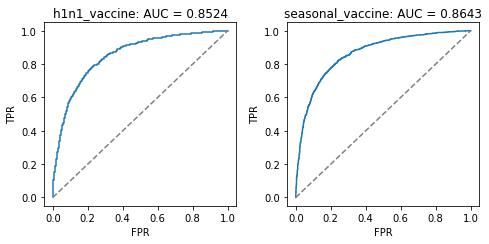

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_pred['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_pred['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_test,y_pred)


0.8583930947777577

In [ ]:
LR = LogisticRegression(solver = 'saga', max_iter = 1000)

In [ ]:
penalty = ['l1', 'l2', 'elastic_net']
l1_ratio = np.linspace(0, 1, 100)
C = np.logspace(0, 10, 20)

In [ ]:
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [ ]:
grid_model_1 = GridSearchCV(LR, param_grid = param_grid)

In [ ]:
grid_model_1.fit(x_train, y_train.iloc[:,0])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8...
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
                         'penalty': ['l1', 'l2', 'elastic_net']})

In [ ]:
grid_model_1.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.010101010101010102, 'penalty': 'l2'}

In [ ]:
pred_2_1 = grid_model_1.predict(x_test)

In [ ]:
grid_model_2 = GridSearchCV(LR, param_grid = param_grid)

In [ ]:
grid_model_2.fit(x_train, y_train.iloc[:,1])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is

GridSearchCV(estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8...
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
                         'penalty': ['l1', 'l2', 'elastic_net']})

In [ ]:
grid_model_2.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [ ]:
pred_2_2 = grid_model_2.predict(x_test)

In [ ]:
pred_2_2

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
y_pred = pd.DataFrame(
    {   "h1n1_vaccine": pred_2_1,
        "seasonal_vaccine": pred_2_2}, 
        index = y_test.iloc[:, 0]
    )

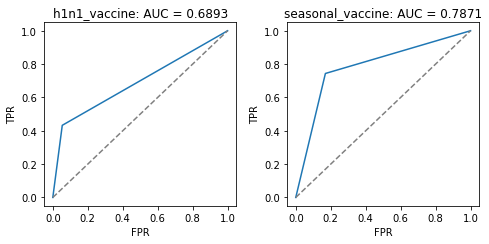

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'], 
    y_pred['h1n1_vaccine'], 
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'], 
    y_pred['seasonal_vaccine'], 
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
roc_auc_score(y_test, y_pred)

0.738213136105953

In [ ]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

parameters = {
    'criterion': ['entropy','gini'],
    'max_depth': np.linspace(1, 20, 10, dtype=int),
    'min_samples_leaf': np.linspace(1, 30, 15, dtype=int),
    'min_samples_split': np.linspace(2, 20, 10, dtype=int)
}

gs = GridSearchCV(dt, parameters, verbose=1, cv=5)

In [ ]:
from sklearn import neighbors, tree, naive_bayes


In [ ]:
knnclf = neighbors.KNeighborsClassifier(5, weights='uniform')
knnclf.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knnpreds_test = knnclf.predict(x_test)

In [ ]:
roc_auc_score(y_test,knnpreds_test)


0.6499270872012051

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth= 10, random_state=0)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
rf_pred = clf.predict(x_test)

In [ ]:
roc_auc_score(y_test, rf_pred)


0.7314911347712441

In [ ]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value}, {} )
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

SyntaxError: ignored

In [ ]:
msl = range(1, 6)
print(msl)

range(1, 6)


In [ ]:
md1 = range(3, 10)
print(md1)

range(3, 10)


In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion= "gini", random_state=33, max_depth= 10)
train_scores, test_scores = calc_params(x_train, y_train, rf, msl, 'min_samples_leaf', 5)


NameError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)

In [ ]:
clf_1 = clf.fit(x_train, y_train.iloc[:, 0])
clf_2 = clf.fit(x_train, y_train.iloc[:, 1])

In [ ]:
gr_pred_1 = clf_1.predict(x_test)
gr_pred_2 = clf_2.predict(x_test)

In [ ]:

gr_pred = pd.DataFrame(
    {   "h1n1_vaccine": gr_pred_1,
        "seasonal_vaccine": gr_pred_2}, 
        index = y_test.iloc[:, 0]
    )

In [ ]:
roc_auc_score(y_test, gr_pred)

0.7264058640597904

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()

In [ ]:
svm_clf_1 = clf.fit(x_train, y_train.iloc[:, 0])

In [ ]:
svc_pred = svm_clf_1.predict(x_test)

In [ ]:
svm_clf_2 = clf.fit(x_train, y_train.iloc[:, 1])

In [ ]:
svc_pred_2 = svm_clf_2.predict(x_test)

In [ ]:
svm_preds = pd.DataFrame(
    {   "h1n1_vaccine": svc_pred,
        "seasonal_vaccine": svc_pred_2}, 
        index = y_test.iloc[:, 0]
    )

In [ ]:
roc_auc_score(y_test, svm_preds)

0.736328314052677

In [ ]:
missing_hlth_ins = data[data.health_insurance.isnull()]

In [ ]:
missing_hlth_ins

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,None,2,1,1,2,3,2,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,None,1,1,2,1,4,3,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,None,2,2,1,2,3,2,1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,None,2,2,1,2,5,3,2.0,3.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,None,2,1,1,2,3,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,None,3,1,2,2,4,3,0.0,0.0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,None,3,2,1,2,5,2,1.0,1.0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,None,3,2,1,1,6,3,1.0,0.0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,None,2,1,1,1,3,1,0.0,0.0


In [ ]:
missing_hlth_ins.loc[:,missing_hlth_ins.columns != "health_insurance"]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,None,2,1,1,2,3,2,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,None,1,1,2,1,4,3,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,None,2,2,1,2,3,2,1.0,0.0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,None,2,2,1,2,5,3,2.0,3.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,None,2,1,1,2,3,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,None,3,1,2,2,4,3,0.0,0.0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,None,3,2,1,2,5,2,1.0,1.0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,None,3,2,1,1,6,3,1.0,0.0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,None,2,1,1,1,3,1,0.0,0.0


In [ ]:
non_missing_hlth_ins = data[data.health_insurance.notnull()]
non_missing_hlth_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                14433 non-null  int64  
 1   h1n1_concern                 14383 non-null  float64
 2   h1n1_knowledge               14359 non-null  float64
 3   behavioral_antiviral_meds    14386 non-null  float64
 4   behavioral_avoidance         14329 non-null  float64
 5   behavioral_face_mask         14422 non-null  float64
 6   behavioral_wash_hands        14415 non-null  float64
 7   behavioral_large_gatherings  14380 non-null  float64
 8   behavioral_outside_home      14384 non-null  float64
 9   behavioral_touch_face        14364 non-null  float64
 10  doctor_recc_h1n1             14069 non-null  float64
 11  doctor_recc_seasonal         14069 non-null  float64
 12  chronic_med_condition        14300 non-null  float64
 13  child_under_6_mo

In [ ]:
non_missing_hlth_ins = non_missing_hlth_ins.loc[:,data.columns != "sex"]


In [ ]:
non_missing_hlth_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                14433 non-null  int64  
 1   h1n1_concern                 14383 non-null  float64
 2   h1n1_knowledge               14359 non-null  float64
 3   behavioral_antiviral_meds    14386 non-null  float64
 4   behavioral_avoidance         14329 non-null  float64
 5   behavioral_face_mask         14422 non-null  float64
 6   behavioral_wash_hands        14415 non-null  float64
 7   behavioral_large_gatherings  14380 non-null  float64
 8   behavioral_outside_home      14384 non-null  float64
 9   behavioral_touch_face        14364 non-null  float64
 10  doctor_recc_h1n1             14069 non-null  float64
 11  doctor_recc_seasonal         14069 non-null  float64
 12  chronic_med_condition        14300 non-null  float64
 13  child_under_6_mo

In [ ]:
missing_hlth_ins = missing_hlth_ins.loc[:,data.columns != "sex"]


IndexError: ignored

In [ ]:
dt_x_train = non_missing_hlth_ins.loc[:,non_missing_hlth_ins.columns != "health_insurance"]
dt_x_train.shape

(14433, 32)

In [ ]:
imp=SimpleImputer(missing_values=np.nan)
non_missing_hlth_ins = pd.DataFrame(imp.fit_transform(dt_x_train))

imp=SimpleImputer(missing_values=np.nan)
missing_hlth_ins = pd.DataFrame(imp.fit_transform(missing_hlth_ins))

In [ ]:
non_missing_hlth_ins.shape

(14433, 33)

In [ ]:
non_missing_hlth_ins.isna().sum()

respondent_id                     0
h1n1_concern                     50
h1n1_knowledge                   74
behavioral_antiviral_meds        47
behavioral_avoidance            104
behavioral_face_mask             11
behavioral_wash_hands            18
behavioral_large_gatherings      53
behavioral_outside_home          49
behavioral_touch_face            69
doctor_recc_h1n1                364
doctor_recc_seasonal            364
chronic_med_condition           133
child_under_6_months              2
health_worker                    10
health_insurance                  0
opinion_h1n1_vacc_effective      45
opinion_h1n1_risk                28
opinion_h1n1_sick_from_vacc      10
opinion_seas_vacc_effective      30
opinion_seas_risk                23
opinion_seas_sick_from_vacc       5
age_group                         0
education                        96
race                              0
income_poverty                 1741
marital_status                   89
rent_or_own                 

In [ ]:
dt_x_train = non_missing_hlth_ins.loc[:,non_missing_hlth_ins.columns != "health_insurance"]
dt_x_train.shape

(14433, 32)

In [ ]:

clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(dt_x_train, non_missing_hlth_ins.iloc[:, 14])

ValueError: ignored

In [ ]:
clf_predict = clf.predict(missing_hlth_ins.loc[:,missing_hlth_ins.columns != "health_insurance"])

AttributeError: ignored

In [ ]:
missing_hlth_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12274 entries, 0 to 12273
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12274 non-null  float64
 1   1       12274 non-null  float64
 2   2       12274 non-null  float64
 3   3       12274 non-null  float64
 4   4       12274 non-null  float64
 5   5       12274 non-null  float64
 6   6       12274 non-null  float64
 7   7       12274 non-null  float64
 8   8       12274 non-null  float64
 9   9       12274 non-null  float64
 10  10      12274 non-null  float64
 11  11      12274 non-null  float64
 12  12      12274 non-null  float64
 13  13      12274 non-null  float64
 14  14      12274 non-null  float64
 15  15      12274 non-null  float64
 16  16      12274 non-null  float64
 17  17      12274 non-null  float64
 18  18      12274 non-null  float64
 19  19      12274 non-null  float64
 20  20      12274 non-null  float64
 21  21      12274 non-null  float64
 22

In [ ]:
non_missing_hlth_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14433 entries, 0 to 14432
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       14433 non-null  float64
 1   1       14433 non-null  float64
 2   2       14433 non-null  float64
 3   3       14433 non-null  float64
 4   4       14433 non-null  float64
 5   5       14433 non-null  float64
 6   6       14433 non-null  float64
 7   7       14433 non-null  float64
 8   8       14433 non-null  float64
 9   9       14433 non-null  float64
 10  10      14433 non-null  float64
 11  11      14433 non-null  float64
 12  12      14433 non-null  float64
 13  13      14433 non-null  float64
 14  14      14433 non-null  float64
 15  15      14433 non-null  float64
 16  16      14433 non-null  float64
 17  17      14433 non-null  float64
 18  18      14433 non-null  float64
 19  19      14433 non-null  float64
 20  20      14433 non-null  float64
 21  21      14433 non-null  float64
 22

In [ ]:
 non_missing_hlth_ins.iloc[:, 15]

0        3.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
14428    5.0
14429    4.0
14430    4.0
14431    3.0
14432    5.0
Name: 15, Length: 14433, dtype: float64